# Part 2:
## Prettiest Water Features of Pittsburgh Neighborhoods
Metric that measures the total number of water features and weighs it based on the number of decorative water features to give a final value. Only neighborhood with decorative water features are give values.

### Number of water features at each neighborhood:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#count
data = pd.read_csv("water_features.csv", sep=',')

data.head()

neighborhoods = data['neighborhood']
count = {}
#adding all the neighborhoods to the array
for name in neighborhoods:
    if name in count:
        count[name] = count.get(name) + 1
    else:
        count[name] = 1

#printing the neighborhood and number of public parks
keys = list(count.keys())
values = list(count.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
for x, y in sorted_dict.items():
    print(x, ":", y)

Squirrel Hill South : 14
Highland Park : 12
Allegheny Center : 8
Bloomfield : 8
Terrace Village : 8
Brookline : 8
Perry North : 7
Point Breeze : 7
East Liberty : 6
Elliott : 6
Carrick : 6
Spring Hill-City View : 6
Mount Washington : 6
Troy Hill : 6
Brighton Heights : 6
South Side Flats : 5
Shadyside : 5
Morningside : 5
Beechview : 5
Central Business District : 4
Garfield : 4
Regent Square : 3
Bedford Dwellings : 3
Lincoln-Lemington-Belmar : 3
Polish Hill : 3
South Oakland : 3
Greenfield : 3
Perry South : 3
Banksville : 3
Hazelwood : 3
North Oakland : 3
Crawford-Roberts : 3
Beltzhoover : 3
Sheraden : 3
Lincoln Place : 3
Manchester : 3
Larimer : 2
West End : 2
Windgap : 2
Westwood : 2
Central Oakland : 2
Duquesne Heights : 2
Upper Hill : 2
South Side Slopes : 2
Marshall-Shadeland : 2
Swisshelm Park : 2
Squirrel Hill North : 2
Allentown : 2
Hays : 2
Central Lawrenceville : 2
Point Breeze North : 2
Homewood South : 1
Middle Hill : 1
Bon Air : 1
Oakwood : 1
Bluff : 1
Homewood West : 1
Strip

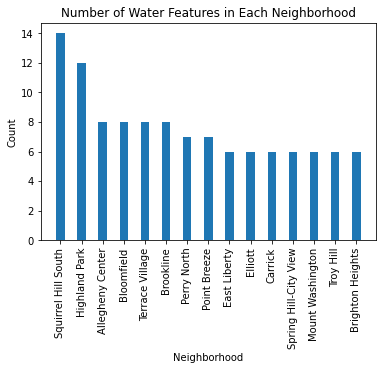

In [14]:
import matplotlib.pyplot as plt

names = list(sorted_dict.keys())[0:15]
values = list(sorted_dict.values())[0:15]

plt.bar(range(len(names)), values, width = 0.4, tick_label=names)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Water Features in Each Neighborhood")
plt.xticks(rotation = 90)
plt.show()

### Narrowing down to only neighborhood with decorative water features:

In [15]:
data = data[~data['name'].str.isnumeric()]
decorative_counts = data[data['feature_type'] == 'Decorative'].groupby('neighborhood').size()
for neighborhood, count in decorative_counts.items():
    print(f'{neighborhood}: {count} decorative water features')


Allegheny Center: 2 decorative water features
Central Oakland: 1 decorative water features
East Liberty: 1 decorative water features
Highland Park: 1 decorative water features
Point Breeze: 2 decorative water features
Squirrel Hill South: 2 decorative water features


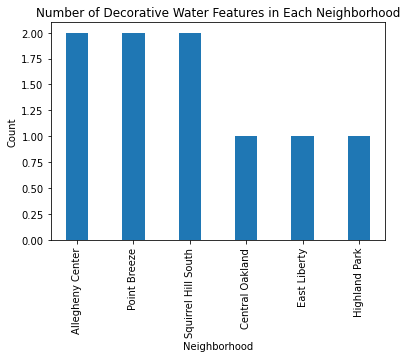

In [16]:
data = data[~data['name'].str.isnumeric()]
decorative_counts = data[data['feature_type'] == 'Decorative'].groupby('neighborhood').size()
sorted_dict = dict(sorted(decorative_counts.items(), key=lambda item: item[1], reverse=True))

names = list(sorted_dict.keys())[0:15]
values = list(sorted_dict.values())[0:15]

plt.bar(range(len(names)), values, width = 0.4, tick_label=names)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Decorative Water Features in Each Neighborhood")
plt.xticks(rotation = 90)

plt.show()





### Standardizing the Data:

In [17]:
data = data[~data['name'].str.isnumeric()]
neighborhood_counts = data.groupby('neighborhood').size()
decorative_counts = data[data['feature_type'] == 'Decorative'].groupby('neighborhood').size()
sorted_neighborhoods = sorted(decorative_counts.items(), key=lambda item: neighborhood_counts[item[0]] * (0.1 * item[1] + 1), reverse=True)

for neighborhood, count in sorted_neighborhoods:
    total_count = neighborhood_counts[neighborhood]
    product = total_count * ((0.1 * count) + 1)
    print(f'{neighborhood}: {count} decorative water features ({total_count} total water features) -> {round(product, 1)}')


Squirrel Hill South: 2 decorative water features (14 total water features) -> 16.8
Highland Park: 1 decorative water features (12 total water features) -> 13.2
Allegheny Center: 2 decorative water features (8 total water features) -> 9.6
East Liberty: 1 decorative water features (6 total water features) -> 6.6
Point Breeze: 2 decorative water features (5 total water features) -> 6.0
Central Oakland: 1 decorative water features (2 total water features) -> 2.2


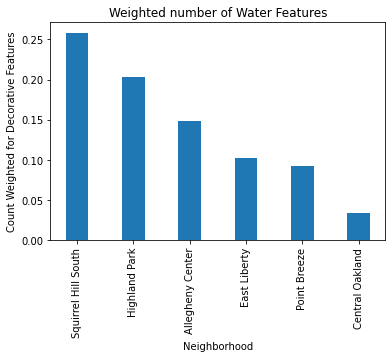

In [9]:
data = data[~data['name'].str.isnumeric()]
neighborhood_counts = data.groupby('neighborhood').size()
decorative_counts = data[data['feature_type'] == 'Decorative'].groupby('neighborhood').size()
products = []
for neighborhood, count in decorative_counts.items():
    total_count = neighborhood_counts[neighborhood]
    product = total_count * ((0.1 * count)+1)
    unique_neighborhoods = data['neighborhood'].nunique()
    product/=unique_neighborhoods
    products.append(product)

data_products = pd.DataFrame({
    'Neighborhood': decorative_counts.index,
    'Decorative Count': decorative_counts.values,
    'Total Count': neighborhood_counts[decorative_counts.index].values,
    'Product': products
})

data_products = data_products.sort_values('Product', ascending=False)
data_top15 = data_products.head(15)

plt.bar(range(len(data_top15)), data_top15['Product'], width = 0.4, tick_label=data_top15['Neighborhood'])
plt.xlabel("Neighborhood")
plt.ylabel("Count Weighted for Decorative Features")
plt.title("Weighted number of Water Features")
plt.xticks(rotation = 90)
plt.show()
